## Week 4, Lab 1: Predicting Left-Handedness from Psychological Factors
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

We'll walk through a full data science problem in this lab. 
- However, there are some additional questions along the way that don't fit neatly into the one main example we'll walk through. Any question that isn't explicitly part of the main example is marked with **(detour)** at the start of the question.

---
## Step 1: Define The Problem.

You're currently a data scientist working at a university. A professor of psychology is attempting to study the relationship between personalities and left-handedness. They have tasked you with gathering evidence so that they may publish.

Specifically, the professor says "I need to prove that left-handedness is caused by some personality trait. Go find that personality trait and the data to back it up."

As a data scientist, you know that any real data science problem must be **specific** and **conclusively answerable**. For example:
- Bad data science problem: "What is the link between obesity and blood pressure?"
    - This is vague and is not conclusively answerable. That is, two people might look at the conclusion and one may say "Sure, the problem has been answered!" and the other may say "The problem has not yet been answered."
- Good data science problem: "Does an association exist between obesity and blood pressure?"
    - This is more specific and is conclusively answerable. The problem specifically is asking for a "Yes" or "No" answer. Based on that, two independent people should both be able to say either "Yes, the problem has been answered" or "No, the problem has not yet been answered."
- Excellent data science problem: "As obesity increases, how does blood pressure change?"
    - This is very specific and is conclusively answerable. The problem specifically seeks to understand the effect of one variable on the other.

### 1. In the context of the left-handedness and personality example, what are three specific and conclusively answerable problems that you could answer using data science? 

> You might find it helpful to check out the codebook in the repo for some inspiration.

Answer:

1. 

2.

3.

---
## Step 2: Obtain the data.

### 2. Read in the file titled "data.csv."
> Hint: Despite being saved as a .csv file, you won't be able to simply `pd.read_csv()` this data!

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split

In [5]:
df = pd.read_csv('data.csv', delimiter='\t')
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,...,US,2,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,...,CA,2,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,...,NL,2,2,30,4,1,1,1,1,2
3,1,4,1,5,1,4,5,4,3,5,...,US,2,1,18,2,2,5,3,2,2
4,5,1,5,1,5,1,5,1,3,1,...,US,2,1,22,3,1,1,3,2,3


In [6]:
# see what cols there are
df.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44', 'introelapse', 'testelapse', 'country',
       'fromgoogle', 'engnat', 'age', 'education', 'gender', 'orientation',
       'race', 'religion', 'hand'],
      dtype='object')

### 3. Suppose that, instead of us giving you this data in a file, you were actually conducting a survey to gather this data yourself. From an ethics/privacy point of view, what are three things you might consider when attempting to gather this data?
> When working with sensitive data like sexual orientation or gender identity, we need to consider how this data could be used if it fell into the wrong hands!

Answer:

1. surveyee may be sensitive about sharing data such as sexual orientation 

2. questions need to be sensitive to race/religion/sexual orientation when they're being crafted

3. name/ID of surveyee needs to be kept confidential

---
## Step 3: Explore the data.

### 4. Conduct exploratory data analysis on this dataset.
> If you haven't already, be sure to check out the codebook in the repo, as that will help in your EDA process.

In [8]:
df.info()
# no nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4184 entries, 0 to 4183
Data columns (total 56 columns):
Q1             4184 non-null int64
Q2             4184 non-null int64
Q3             4184 non-null int64
Q4             4184 non-null int64
Q5             4184 non-null int64
Q6             4184 non-null int64
Q7             4184 non-null int64
Q8             4184 non-null int64
Q9             4184 non-null int64
Q10            4184 non-null int64
Q11            4184 non-null int64
Q12            4184 non-null int64
Q13            4184 non-null int64
Q14            4184 non-null int64
Q15            4184 non-null int64
Q16            4184 non-null int64
Q17            4184 non-null int64
Q18            4184 non-null int64
Q19            4184 non-null int64
Q20            4184 non-null int64
Q21            4184 non-null int64
Q22            4184 non-null int64
Q23            4184 non-null int64
Q24            4184 non-null int64
Q25            4184 non-null int64
Q26            418

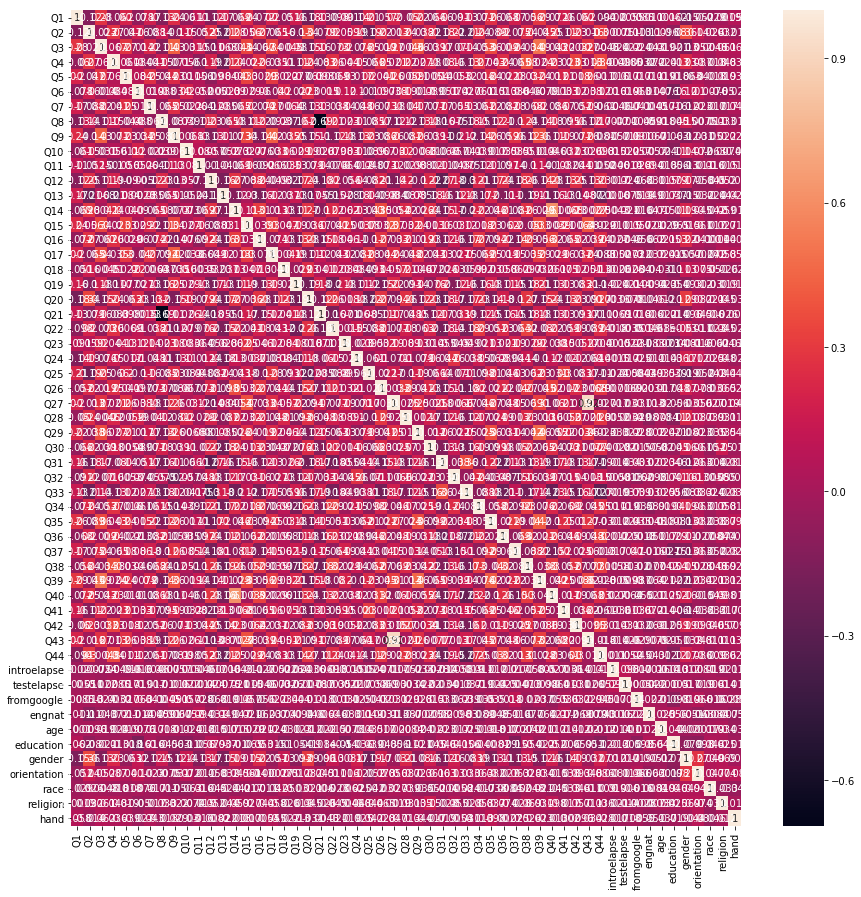

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

# probably a bad idea to use heatmap here, cos answers may not be on a scale 
# really hard to see correlations from here. 

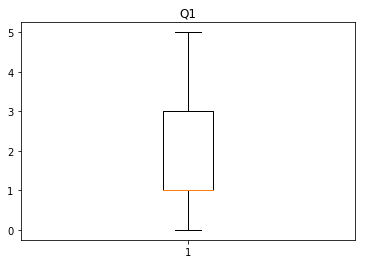

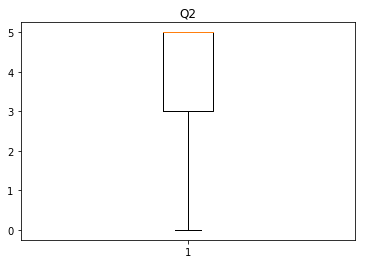

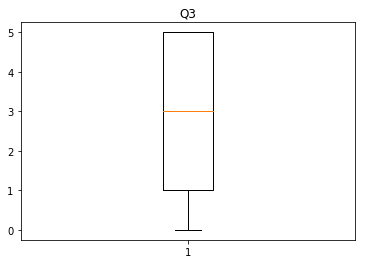

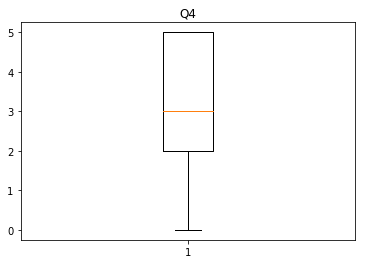

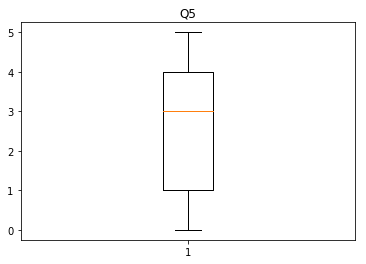

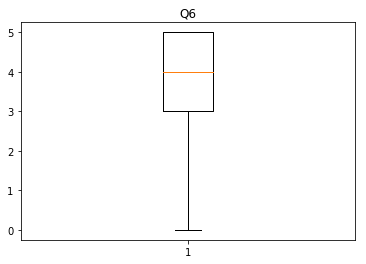

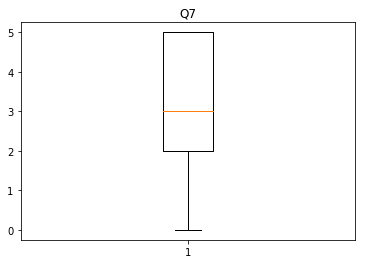

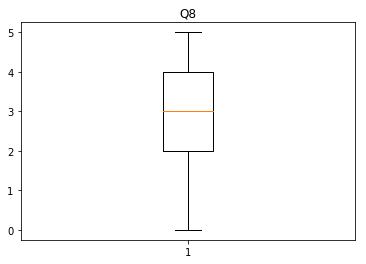

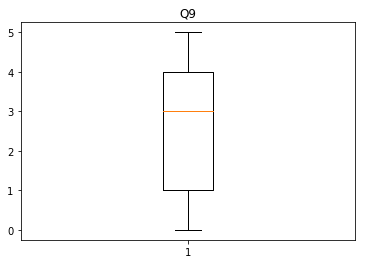

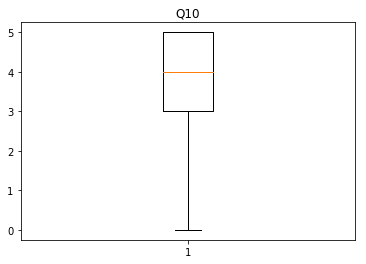

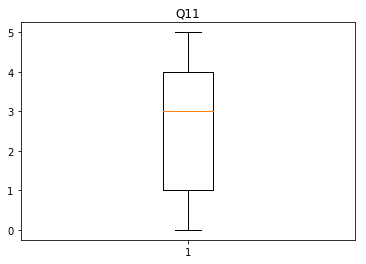

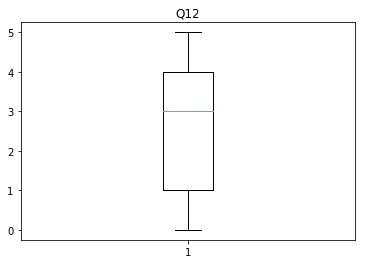

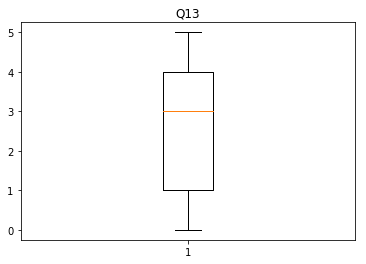

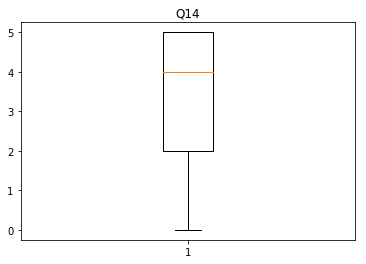

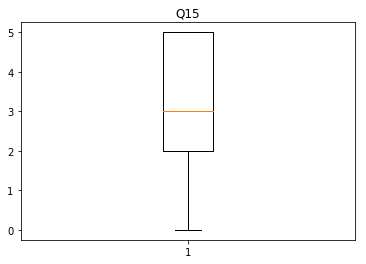

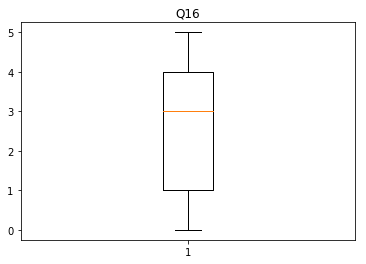

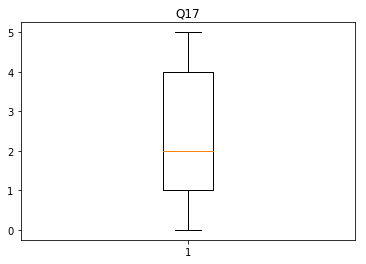

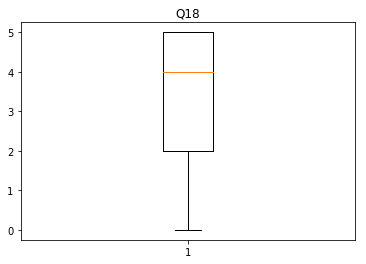

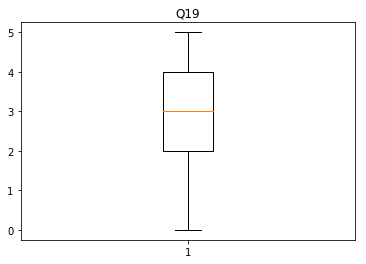

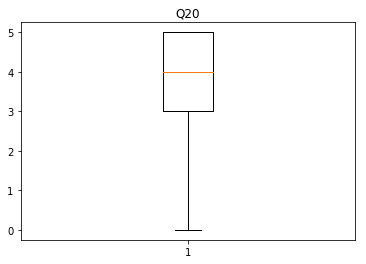

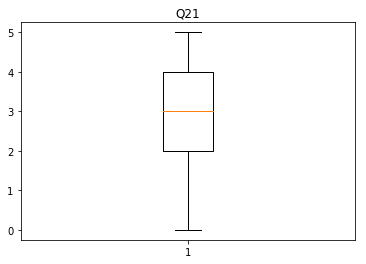

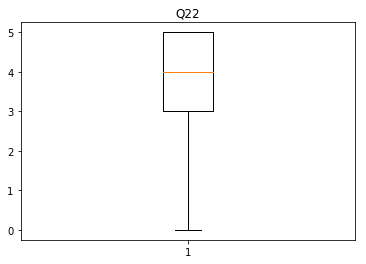

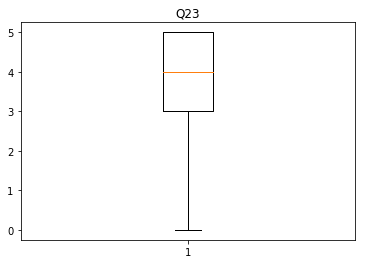

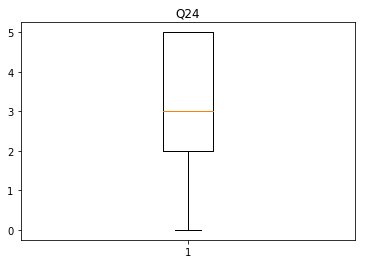

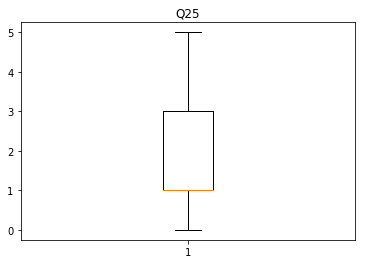

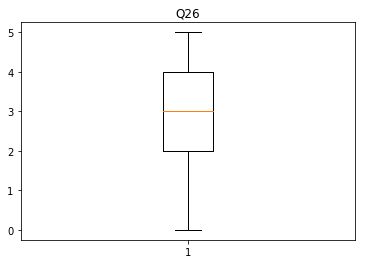

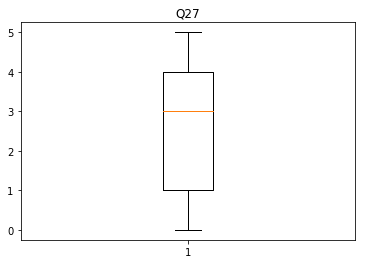

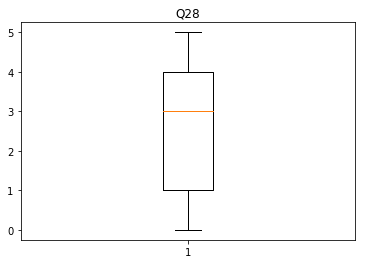

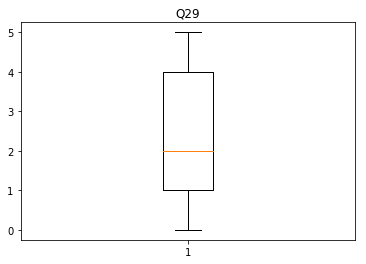

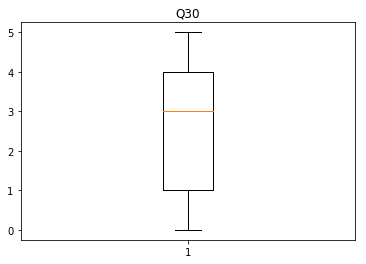

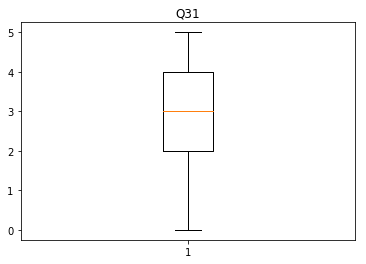

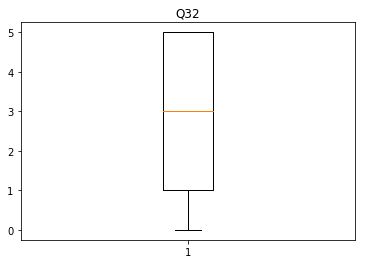

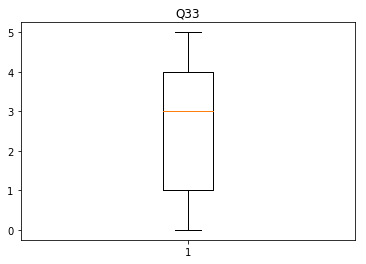

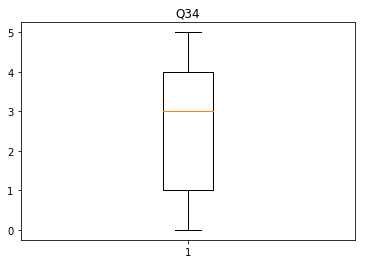

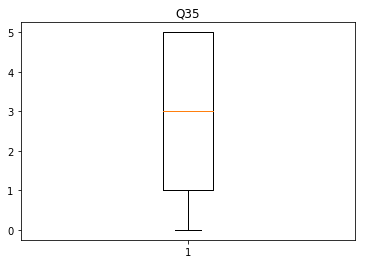

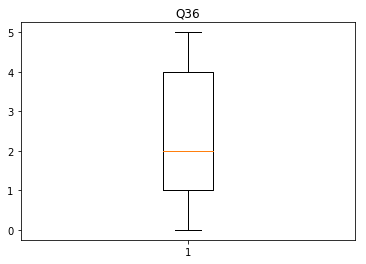

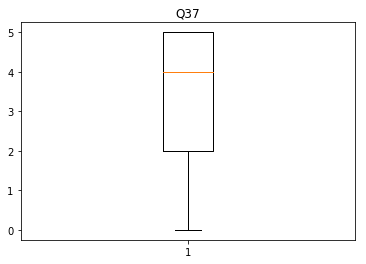

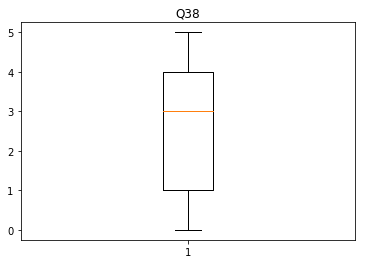

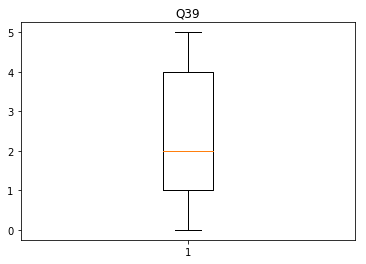

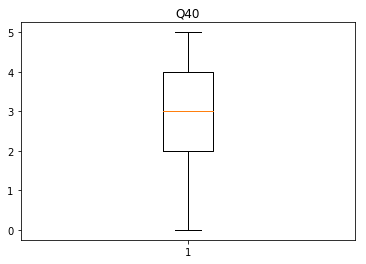

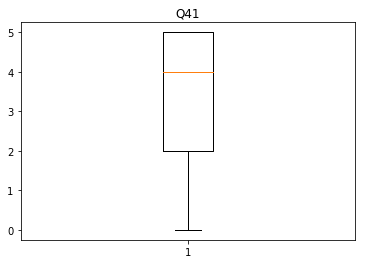

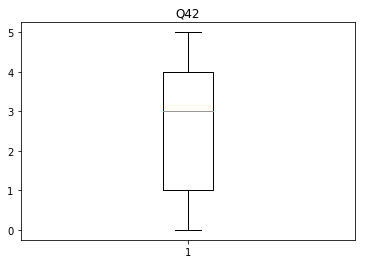

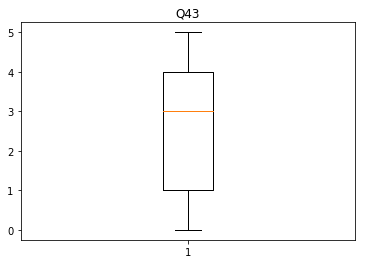

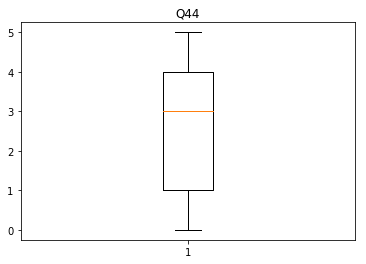

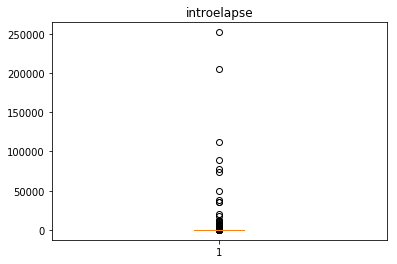

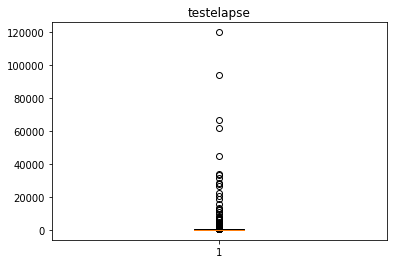

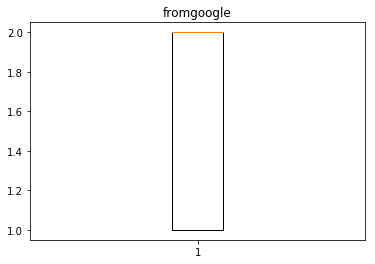

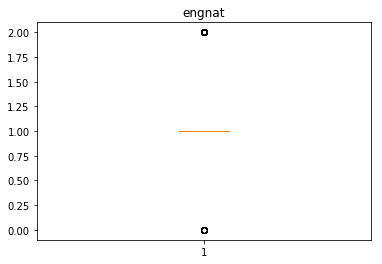

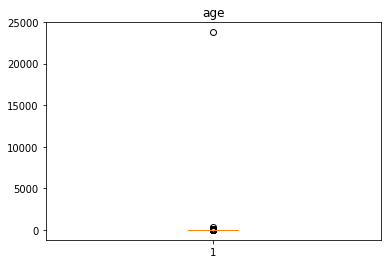

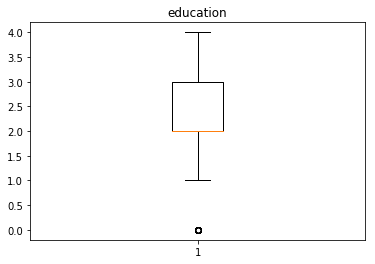

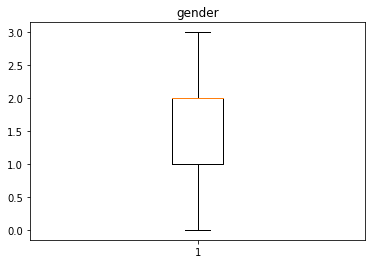

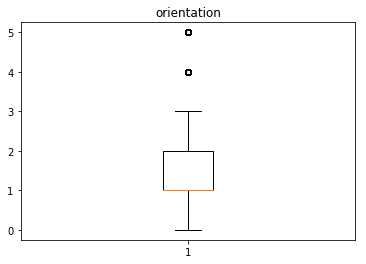

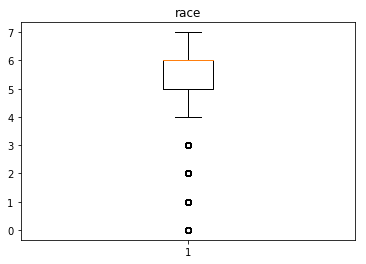

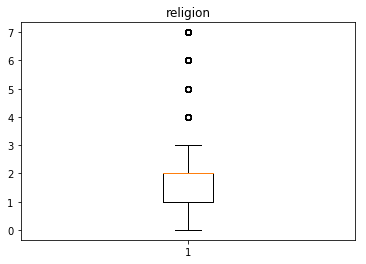

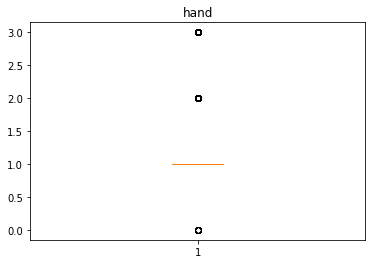

In [19]:
features = [k for k in df.columns if k!='country']
for i in range(len(df[features].columns)):
    plt.boxplot(df[df[features].columns[i]])
    plt.title(df[features].columns[i])
    plt.show()
# 1 outlier for age

In [21]:
df['age'].describe()

count     4184.000000
mean        30.370698
std        367.201726
min         13.000000
25%         18.000000
50%         21.000000
75%         27.000000
max      23763.000000
Name: age, dtype: float64

In [25]:
# remove this outlier
df = df[df['age']<150]

In [26]:
df['age'].describe()

count    4182.000000
mean       24.605213
std        10.974446
min        13.000000
25%        18.000000
50%        21.000000
75%        27.000000
max       123.000000
Name: age, dtype: float64

In [30]:
np.bincount(df['hand'])
# 'hand' looks alright, no outliers. there are 4 categories, perhaps can't write, R, L, both

array([  10, 3541,  452,  179], dtype=int64)

---
## Step 4: Model the data.

### 5. Suppose I wanted to use Q1 - Q44 to predict whether or not the person is left-handed. Would this be a classification or regression problem? Why?

Answer: 

classification. these are discrete features, so is the target

### (detour) 6. While this isn't the problem we set out to solve, suppose I wanted to predict the exact age of the respondent using Q1 - Q44 as my predictors. Would this be a classification or regression problem? Why?

Answer:

regression. target is continuous

### 7. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed based on their responses to Q1 - Q44. Before doing that, however, you remember that it is often a good idea to standardize your variables. In general, why would we standardize our variables? Give an example of when we would standardize our variables.

Answer: 

### 8. Give an example of when we might not standardize our variables.

Answer: 

### 9. Based on your answers to 7 and 8, do you think we should standardize our predictor variables in this case? Why or why not?

Answer: 

### 10. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed. What munging/cleaning do we need to do to our $y$ variable in order to explicitly answer this question? Do it.

Answer: 

### 11. The professor for whom you work suggests that you set $k = 4$. Why might this be a bad idea in this specific case?

Answer: 

### 12. Let's *(finally)* use $k$-nearest neighbors to predict whether or not a person is left-handed!

> Be sure to create a train/test split with your data!

> Create four separate models, one with $k = 3$, one with $k = 5$, one with $k = 15$, and one with $k = 25$.

> Instantiate and fit your models.

Being good data scientists, we know that we might not run just one type of model. We might run many different models and see which is best.

### 13. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, let's check the [documentation for logistic regression in sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Is there default regularization? If so, what is it? If not, how do you know?

Answer: 

### 14. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, should we standardize our features? Well, the answer is (as always), **it depends**. What is one reason you would standardize? What is one reason you would not standardize?

Answer:
- An example of when I would standardize in logistic regression is...
- An example of when I would not standardize in logistic regression is...

### 15. Let's use logistic regression to predict whether or not the person is left-handed.


> Be sure to use the same train/test split with your data as with your $k$-NN model above!

> Create four separate models, one with LASSO and $\alpha = 1$, one with LASSO and $\alpha = 10$, one with Ridge and $\alpha = 1$, and one with Ridge and $\alpha = 10$. *(Hint: Be careful with how you specify $\alpha$ in your model!)*

> Instantiate and fit your models.

---
## Step 5: Evaluate the model(s).

### 16. Before calculating any score on your data, take a step back. Think about your $X$ variable and your $Y$ variable. Do you think your $X$ variables will do a good job of predicting your $Y$ variable? Why or why not?

Answer:

### 17. Using accuracy as your metric, evaluate all eight of your models on both the training and testing sets. Put your scores below. (If you want to be fancy and generate a table in Markdown, there's a [Markdown table generator site linked here](https://www.tablesgenerator.com/markdown_tables#).)

Answer:

### 18. In which of your $k$-NN models is there evidence of overfitting? How do you know?

Answer:

### 19. Broadly speaking, how does the value of $k$ in $k$-NN affect the bias-variance tradeoff? (i.e. As $k$ increases, how are bias and variance affected?)

Answer:

### 20. If you have a $k$-NN model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

Answer:

### 21. In which of your logistic regression models is there evidence of overfitting? How do you know?

Answer:

### 22. Broadly speaking, how does the value of $C$ in logistic regression affect the bias-variance tradeoff? (i.e. As $C$ increases, how are bias and variance affected?)

Answer:

### 23. For your logistic regression models, play around with the regularization hyperparameter, $C$. As you vary $C$, what happens to the fit and coefficients in the model? What might this mean in the context of this problem?

Answer:

### 24. If you have a logistic regression model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

Answer:

---
## Step 6: Answer the problem.

### 25. Suppose you want to understand which psychological features are most important in determining left-handedness. Would you rather use $k$-NN or logistic regression? Why?

Answer:

### 26. Select a logistic regression model. Interpret the coefficient for `Q1`.

Answer:

### 27. If you have to select one model overall to be your *best* model, which model would you select? Why?

Answer:

### 28. Circle back to the three specific and conclusively answerable questions you came up with in Q1. Answer these for the professor based on the model you selected!

Answer:

### BONUS:
Looking for more to do? Probably not - you're busy! But if you want to, consider exploring the following:
- Suppose this data were in a `SQL` database named `data` and a table named `inventory`. What `SQL` query would return the count of people who were right-handed, left-handed, both, or missing with their class labels of 1, 2, 3, and 0, respectively? (You can assume you've already logged into the database.)
- Fit and evaluate one or more of the generalized linear models discussed above.
- Create a plot comparing training and test metrics for various values of $k$ and various regularization schemes in logistic regression.
- Rather than just evaluating models based on accuracy, consider using sensitivity, specificity, etc.
- In the context of predicting left-handedness, why are unbalanced classes concerning? If you were to re-do this process given those concerns, what changes might you make?